In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%run read&clean.ipynb
%run Jean.ipynb

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

In [4]:
df_clean_columns = df_clean.columns

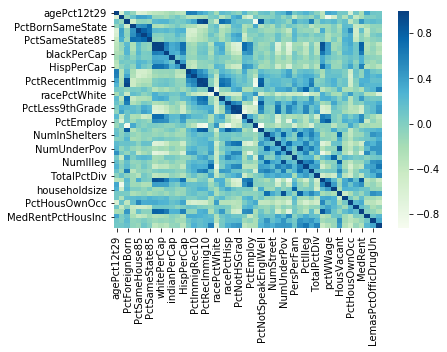

agePct12t29 0
agePct65up 1
PctForeignBorn 2
PctForeignBorn 15
PctForeignBorn 16
PctForeignBorn 19
PctForeignBorn 26
PctBornSameState 3
PctBornSameState 6
PctSameHouse85 4
PctSameHouse85 5
PctSameCity85 4
PctSameCity85 5
PctSameCity85 6
PctSameState85 3
PctSameState85 5
PctSameState85 6
perCapInc 7
perCapInc 8
perCapInc 12
perCapInc 23
perCapInc 37
perCapInc 44
whitePerCap 7
whitePerCap 8
whitePerCap 23
whitePerCap 37
whitePerCap 44
blackPerCap 9
indianPerCap 10
AsianPerCap 11
HispPerCap 7
HispPerCap 12
PctImmigRecent 13
PctImmigRecent 14
PctImmigRec10 13
PctImmigRec10 14
PctRecentImmig 2
PctRecentImmig 15
PctRecentImmig 16
PctRecentImmig 26
PctRecImmig10 2
PctRecImmig10 15
PctRecImmig10 16
PctRecImmig10 19
PctRecImmig10 26
racepctblack 17
racepctblack 34
racePctWhite 18
racePctAsian 2
racePctAsian 16
racePctAsian 19
racePctHisp 20
racePctHisp 26
PctLess9thGrade 21
PctLess9thGrade 22
PctNotHSGrad 21
PctNotHSGrad 22
PctBSorMore 7
PctBSorMore 8
PctBSorMore 23
PctEmploy 24
PctEmploy 38
Pct

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

list_correlation = ['fold','agePct12t29', 'agePct65up', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'perCapInc', 'whitePerCap', 'blackPerCap','indianPerCap', 'AsianPerCap', 'HispPerCap', 'PctImmigRecent', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig10', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctEmploy', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'NumInShelters', 'NumStreet', 'PctUnemployed', 'NumUnderPov', 'PctPopUnderPov', 'PersPerFam', 'NumIlleg', 'PctIlleg', 'NumImmig', 'TotalPctDiv','medIncome', 'pctWWage', 'householdsize', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'MedYrHousBuilt', 'MedRent', 'MedRentPctHousInc', 'LemasPctOfficDrugUn', 'ViolentCrimesPerPop']
correlation_df = pd.DataFrame()

for i in range(0, len(list_correlation)):
    if list_correlation[i] not in df_clean_columns:
        list_correlation.remove(df_clean_columns[i])
correlation_df = df_clean[list_correlation]

for j in range (0, len(list_correlation)):
    if type(correlation_df[list_correlation[j]][1]) is not float:
        print(list_correlation[j])
        

correlation_df_fold_1 = correlation_df[correlation_df['fold']==1]
correlation_df_fold_1 = correlation_df_fold_1.drop(columns = 'fold')
correlation_df_fold_1 = correlation_df_fold_1.astype(float).corr()
#Heatmap of correlation coefficient 
sns.heatmap(correlation_df_fold_1, cmap = 'GnBu')
plt.show()

#Identify higher correlation coefficent


columns = correlation_df_fold_1.columns
for i in range (0, len(columns)):
    for j in range(0, len(correlation_df_fold_1)):
        if correlation_df_fold_1[columns[i]][j] > 0.7:
            print(columns[i], columns[j)



In [ ]:
from sklearn.decomposition import PCA
Class = pd.DataFrame(correlation_df.columns)
print(Class)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalize_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
target = list(correlation_df.columns.values)
finalDf = pd.concat([principalDf,Class] ,axis = 1)
finalDf2 = finalDf(columns = ['principal component 1', 'principal component 2'], axis = 1)
print(finalDf.columns)

In [ ]:
sns.set()
print(Class)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
targets = Class
colors = ['y', 'r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()